### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="ae24ec9fb1102206624e87bb931fc8dea5e7338d"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-01-06 00:00:00+00:00,117.91,118.16,116.47,116.780,31751900,27.743303,27.802126,27.404482,27.477423,127007600,0.0,1.0
1,AAPL,2017-01-09 00:00:00+00:00,118.99,119.43,117.94,117.950,33561948,27.997418,28.100947,27.750362,27.752715,134247792,0.0,1.0
2,AAPL,2017-01-10 00:00:00+00:00,119.11,119.38,118.30,118.770,24462051,28.025654,28.089182,27.835067,27.945654,97848204,0.0,1.0
3,AAPL,2017-01-11 00:00:00+00:00,119.75,119.93,118.60,118.740,27588593,28.176241,28.218593,27.905655,27.938595,110354372,0.0,1.0
4,AAPL,2017-01-12 00:00:00+00:00,119.25,119.30,118.21,118.895,27086220,28.058594,28.070359,27.813891,27.975066,108344880,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-12-28 00:00:00+00:00,179.29,181.33,178.53,180.160,79144339,179.29,181.33,178.53,180.160,79144339,0.0,1.0
1253,AAPL,2021-12-29 00:00:00+00:00,179.38,180.63,178.14,179.330,62348931,179.38,180.63,178.14,179.330,62348931,0.0,1.0
1254,AAPL,2021-12-30 00:00:00+00:00,178.20,180.57,178.09,179.470,59773014,178.20,180.57,178.09,179.470,59773014,0.0,1.0
1255,AAPL,2021-12-31 00:00:00+00:00,177.57,179.23,177.26,178.085,61661433,177.57,179.23,177.26,178.085,61661433,0.0,1.0
1256,AAPL,2022-01-03 00:00:00+00:00,182.01,182.88,177.71,177.830,104701220,182.01,182.88,177.71,177.830,104701220,0.0,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       117.91
1       118.99
2       119.11
3       119.75
4       119.25
         ...  
1252    179.29
1253    179.38
1254    178.20
1255    177.57
1256    182.01
Name: close, Length: 1257, dtype: float64

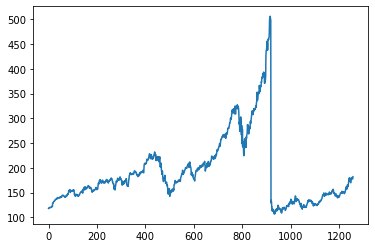

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       117.91
1       118.99
2       119.11
3       119.75
4       119.25
         ...  
1252    179.29
1253    179.38
1254    178.20
1255    177.57
1256    182.01
Name: close, Length: 1257, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.02772699]
 [0.03043206]
 [0.03073262]
 ...
 [0.17873513]
 [0.17715717]
 [0.18827802]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 440)

In [19]:
train_data

array([[0.02772699],
       [0.03043206],
       [0.03073262],
       [0.03233563],
       [0.03108328],
       [0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.084

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 447ms/step - loss: 0.0192 - val_loss: 0.0113
Epoch 2/100
12/12 [==============================] - 3s 235ms/step - loss: 0.0038 - val_loss: 0.0219
Epoch 3/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0018 - val_loss: 0.0182
Epoch 4/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0011 - val_loss: 0.0197
Epoch 5/100
12/12 [==============================] - 3s 259ms/step - loss: 8.8144e-04 - val_loss: 0.0168
Epoch 6/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0010 - val_loss: 0.0175
Epoch 7/100
12/12 [==============================] - 3s 233ms/step - loss: 8.7533e-04 - val_loss: 0.0192
Epoch 8/100
12/12 [==============================] - 3s 211ms/step - loss: 8.5294e-04 - val_loss: 0.0183
Epoch 9/100
12/12 [==============================] - 3s 239ms/step - loss: 7.9645e-04 - val_loss: 0.0174
Epoch 10/100
12/12 [==============================] - 3s 243ms/step - loss:

12/12 [==============================] - 3s 284ms/step - loss: 3.1137e-04 - val_loss: 0.0098
Epoch 79/100
12/12 [==============================] - 3s 253ms/step - loss: 3.4407e-04 - val_loss: 0.0082
Epoch 80/100
12/12 [==============================] - 3s 244ms/step - loss: 3.1086e-04 - val_loss: 0.0089
Epoch 81/100
12/12 [==============================] - 2s 199ms/step - loss: 2.8830e-04 - val_loss: 0.0089
Epoch 82/100
12/12 [==============================] - 2s 195ms/step - loss: 2.9826e-04 - val_loss: 0.0085
Epoch 83/100
12/12 [==============================] - 2s 193ms/step - loss: 3.0622e-04 - val_loss: 0.0085
Epoch 84/100
12/12 [==============================] - 2s 195ms/step - loss: 3.1735e-04 - val_loss: 0.0087
Epoch 85/100
12/12 [==============================] - 2s 194ms/step - loss: 3.0085e-04 - val_loss: 0.0078
Epoch 86/100
12/12 [==============================] - 2s 194ms/step - loss: 3.2349e-04 - val_loss: 0.0090
Epoch 87/100
12/12 [==============================] - 2s 19

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.3.1'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

203.18915878618395

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

145.54253852916426

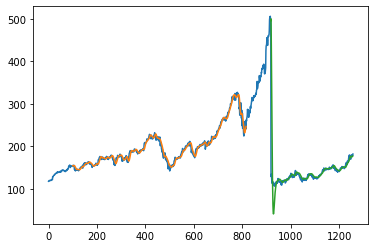

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.10584846587351276,
 0.11090795241077017,
 0.10857858484658728,
 0.09898559799624296,
 0.09983719474013769,
 0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430

In [44]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps-1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17980468]
100
[0.17980468]
101
2 day input [0.11090795 0.10857858 0.0989856  0.09983719 0.10356919 0.10737633
 0.10715091 0.10399499 0.10194114 0.10459612 0.11591735 0.11268629
 0.11438948 0.11724483 0.11887289 0.12485911 0.12090169 0.11829681
 0.10552286 0.10697558 0.10339386 0.10567314 0.10507201 0.09823419
 0.09041954 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595
 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169 0.08583594
 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782 0.085335
 0.09247339 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025
 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175
 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476
 0.1101315  0.10289292 0.10276769 0.10807765 0.10810269 0.11060739
 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877
 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583
 0.14647464 0.16115216 0.17092048 0.16961803 0.181866   0.17257358
 0.16904195 0.18149

8 day output [[0.18450779]]
9 day input [0.10399499 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948
 0.11724483 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286
 0.10697558 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954
 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0

17 day output [[0.18691814]]
18 day input [0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.17980468 0.17980468
 0.18215114 0.1827964

25 day output [[0.18904553]]
26 day input [0.09041954 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595
 0.0878397  0.09014402 0.08681277 0.08969317 0.08090169 0.08583594
 0.08806512 0.09129618 0.09031935 0.09009393 0.08683782 0.085335
 0.09247339 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025
 0.10482154 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175
 0.10549781 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476
 0.1101315  0.10289292 0.10276769 0.10807765 0.10810269 0.11060739
 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877
 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583
 0.14647464 0.16115216 0.17092048 0.16961803 0.181866   0.17257358
 0.16904195 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566
 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513
 0.17715717 0.18827802 0.17980468 0.17980468 0.18215114 0.18279642
 0.18325743 0.18361889 0.18393226 0.18422446 0.18450779 0.18478651
 0.18506186 0.18533394 

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df1)

1257

ValueError: x and y must have same first dimension, but have shapes (100,) and (99, 1)

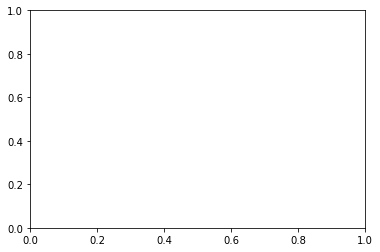

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)